In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
import warnings
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
import seaborn as sns


pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
warnings.filterwarnings("ignore")

In [2]:
datatrain = pd.read_csv(r"D:\Travail\Poornima\Dataset\NSL-KDD\KDDTrain+.csv")
datatrain.drop('id', axis='columns', inplace=True)
datatest = pd.read_csv(r"D:\Travail\Poornima\Dataset\NSL-KDD\KDDTest+.csv")

In [3]:
for col_name in datatrain.columns:
    if datatrain[col_name].dtypes == 'object' :
        unique_cat = len(datatrain[col_name].unique())
for col_name in datatest.columns:
    if datatest[col_name].dtypes == 'object' :
        unique_cat = len(datatest[col_name].unique())
        
categorical_columns=['protocol_type', 'service', 'flag'] 

datatrain_cat_values = datatrain[categorical_columns]
datatest_cat_values = datatest[categorical_columns]

unique_protocol=sorted(datatrain.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]

unique_service=sorted(datatrain.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]

unique_flag=sorted(datatrain.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]

dumcols=unique_protocol2 + unique_service2 + unique_flag2

unique_service_test=sorted(datatest.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

datatrain_cat_values_enc=datatrain_cat_values.apply(LabelEncoder().fit_transform)
datatest_cat_values_enc=datatest_cat_values.apply(LabelEncoder().fit_transform)

enc = OneHotEncoder()
datatrain_cat_values_ENC = enc.fit_transform(datatrain_cat_values_enc)
datatrain_cat_data = pd.DataFrame(datatrain_cat_values_ENC.toarray(),columns=dumcols)

dataset_cat_values_ENC = enc.fit_transform(datatest_cat_values_enc)
datatest_cat_data = pd.DataFrame(dataset_cat_values_ENC.toarray(),columns=testdumcols)

trainservice=datatrain['service'].tolist()
testservice= datatest['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]

trainservice=datatrain['service'].tolist()
testservice= datatest['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]

for col in difference:
    datatest_cat_data[col] = 0

    
newdf=datatrain.join(datatrain_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)

newdf_test=datatest.join(datatest_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)

labeldf=newdf['class']
labeldf_test=newdf_test['class']

newlabeldf=labeldf.replace({ 'normal' : 0, 'anomaly' : 1})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'anomaly' : 1})

newdf['class'] = newlabeldf
newdf_test['class'] = newlabeldf_test


X_train = newdf.drop('class',1)
Y_train = newdf["class"]

X_test = newdf_test.drop('class',1)
Y_test = newdf_test["class"]

colNames=list(X_train)
colNames_test=list(X_test)

scaler1 = preprocessing.StandardScaler().fit(X_train)
X_train = scaler1.transform(X_train)  

scaler2 = preprocessing.StandardScaler().fit(X_test)
X_test = scaler2.transform(X_test) 






#from sklearn.feature_selection import SelectPercentile, f_classif
#np.seterr(divide='ignore', invalid='ignore');
#selector=SelectPercentile(f_classif, percentile=10)

#X_newtrain = selector.fit_transform(X_train,Y_train)
#X_newtest = selector.fit_transform(X_test,Y_test)

#true=selector.get_support()
#newcolindex_data=[i for i, x in enumerate(true) if x]
#newcolname_data=list( colNames[i] for i in newcolindex_data )


#clf = DecisionTreeClassifier(random_state=0)
#rfe = RFE(clf, n_features_to_select=1)
#rfe.fit(X_newtrain, Y_train.astype('int'))

#clf = DecisionTreeClassifier(random_state=0)
#rfe = RFE(estimator=clf, n_features_to_select=13, step=1)
#rfe.fit(X_train, Y_test.astype(int))
#X_rfetrain=rfe.transform(X_train)
#true=rfe.support_
#rfecolindex_data=[i for i, x in enumerate(true) if x]
#rfecolname_data=list(colNames[i] for i in rfecolindex_data)

#clf_DTC=DecisionTreeClassifier(random_state=0)
#clf_DTC.fit(X_train, Y_train.astype(int))

#y_pred = clf_DTC.predict(X_test)


#print('Training Accuracy = ' + str(accuracy_score(Y_test, y_pred)*100) + "%")




In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import time
start_time = time.time()

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, Y_train)


stop_time=time.time()
print(f"Training time: {stop_time - start_time}s")

y_pred_training=lda.predict(X_train)
print('Training Accuracy = ' + str(accuracy_score(Y_train, y_pred_training)*100) + "%")

y_pred_test=lda.predict(X_test)
print('\nTesting Accuracy = ' + str(accuracy_score(Y_test, y_pred_test)*100) + "%")
print('Testing Precision = ' + str(precision_score(Y_test, y_pred_test)*100) + "%")
print('Testing Recall = ' + str(recall_score(Y_test, y_pred_test)*100) + "%")


Training time: 2.5448997020721436s
Training Accuracy = 96.62626118295191%

Testing Accuracy = 75.4347054648687%
Testing Precision = 91.20072291878459%
Testing Recall = 62.91591989402322%


<AxesSubplot:>

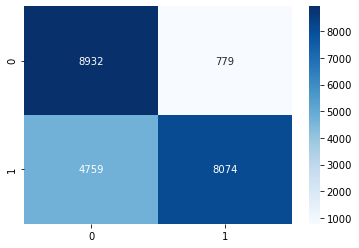

In [5]:
cf_matrix = confusion_matrix(Y_test, y_pred_test)
sns.heatmap(cf_matrix, annot=True,cmap='Blues', fmt='g')

In [6]:
import pickle

#
# Create your model here (same as above)
#

# Save to file in the current working directory
pkl_filename = "pkl/LDA_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)